In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
%matplotlib inline

### What are Generative Classifiers?

Say we have a feature x and a target variable y.

Generative Classifiers learn the joint probability distribution P(x,y) with the focus on how the features and the target variable occur together.

So, the aim is to be able to model how the data gets generated hence the name Generative Classifiers. Once the model understands the data generation process (i.e. the underlying data distribution), it can take new data points in and make predictions on them

In order to make predictions, generative classifiers transforms the joint probability P(x,y) to a conditional probability P(y|x) using Bayes Rule.

### Introduction to Naive Bayes Classifier

Naive Bayes Classifier is a Generative Classifier which makes strong (naive) conditional independence assumption between features given a label.
Therefore Likelihood can be expressed as

$$
p(\textbf x|y) = P(x_{1},x_{2},...,x_{m}, |\ y) = P(x_{1}|\ y)P(x_{2}|\ y)...P(x_{m}|\ y) = \prod \limits_{j = 1}^{m} P(x_{i}|\ y)
$$

#### Bayes Theorem
$$
p(y=y_{c}|\textbf x) = \cfrac{p(\textbf x,y)}{p(\textbf x)} = \cfrac{p(\textbf x|y_{c})p(y_{c})}{p(\textbf x)}
$$

Here,

$p(y=y_{c}|\textbf x)$ is the Posterior Probability

$p(\textbf x|y_{c}))$ is the Class Conditional Density

$p(y_{c})$ is the Class Prior

$p(\textbf x)$ is the Evidence

$$
Posterior = \cfrac{Prior\times Likelihood}{Evidence}
$$

After using Bayes Theorem and the Conditional Independence Assumption we get,
$$
p(y=y_{c}|\textbf x) = \cfrac{p(y_{c}) \prod \limits_{j = 1}^{m} P(x_{i}|\ y_{c})}{\sum \limits_{r = 1}^{k} p(y_{r})\prod \limits_{j = 1}^{m} P(x_{i}|\ y_{r})}
$$

Here,

$ \sum \limits_{r = 1}^{k} p(y_{r}) $ corresponds to the $k$ prior probabilities

$ \prod \limits_{j = 1}^{m} P(x_{i}|\ y_{r}) $ corresponds to the $ k\times m$ class conditional densities

The number of parameters for each conditional density vary and depends on its mathematical form.

#### Example 

A setting where the Naive Bayes classifier is often used is spam filtering. Here, the data is emails and the label is spam or not-spam. The Naive Bayes assumption implies that the words in an email are conditionally independent, given that you know that an email is spam or not. Clearly this is not true. Neither the words of spam or not-spam emails are drawn independently at random. However, the resulting classifiers can work well in practice even if this assumption is violated.

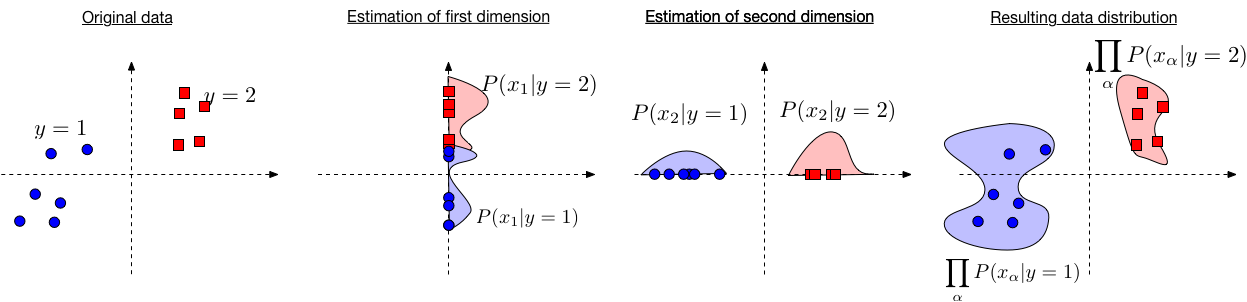
Illustration behind the Naive Bayes algorithm. We estimate $P(x_{α})|y)$ independently in each dimension (middle two images) and then obtain an estimate of the full data distribution by assuming conditional independence $P(\mathbf{x}|y)=\prod_\alpha P(x_\alpha|y)$ (very right image).

### Modeling conditional densities: $p(x_{i}∣y)$
#### 1. Binary feature - Bernoulli Distribution
e.g. word is present or not
$$
p(x_{j}∣y_{c}) ∼ Bernoulli(μ_{jc})
$$
When $x_{j}$ is a binary feature, we use Bernoulli distribution to
model the class conditional density:$ p(x_{j}|y_{c}) $
Lets take the parameter for the bernoulli Distribution as $μ_{jc}$
$$
p(x_{j}=1|y_{c})=μ_{jc}
p(x_{j}=0|y_{c})=1-μ_{jc}
$$
Combining the two equations we get:
$$
p(x_{j}|y{c};μ_{jc})=μ_{jc}^{x_{j}}(1-μ_{jc})^{(1-x_{j})}
$$
For $s\le m$ binary features and classes, we will have $k \times s$
parameters for $s$ Bernoulli distributions.

### Inference
Once we learn parameters of different conditional densities, we use them to infer class label for new example.
We assign a class label to a new example that maximizes
the posterior probability.
$$
y = \underset{y_{c}}{\operatorname{argmax}}p(y_{c}∣\mathbf x;\mathbf w)
$$
Using the definition of posterior probability, we get,
$$
y = \underset{y_{c}}{\operatorname{argmax}} \cfrac {p(\mathbf x|y_{c};\mathbf w)\ p(y_{c};\mathbf w)}{p(\mathbf x,\mathbf w)}
$$
Since is independent of , we ignore denominator from this computation
$$
y = \underset{y_{c}}{\operatorname{argmax}} p(\mathbf x|y_{c};\mathbf w)\ p(y_{c};\mathbf w)
$$
Expanding p(x∣y ; w) with naive Bayes assumption, we get
$$
y = \underset{y_{c}}{\operatorname{argmax}} \left( \prod_{j=1}^{m}p(\mathbf x_{j}|y_{c};\mathbf w)\right)\ p(y_{c};\mathbf w)
$$
This equation involves multiplication of small numbers,there is a risk of underflow in this calculation. Hence we calculat the maximum in the log-space
$$
y = \underset{y_{c}}{\operatorname{argmax}} \left( \sum_{j=1}^{m}log \ p(\mathbf x_{j}|y_{c};\mathbf w)\right)\ log \ p(y_{c};\mathbf w)
$$
For a new example, , we assign a class label that yields max value among all $y$ = {$y_{1},...,y_{k}$}.
This equation is useful for getting the class label. however it does not return the probability of an example belonging to class y_{c}. In case, we want the probability, we should use the following
equation and that calculation should also be performed in log space.
$$
y=\cfrac {p(\mathbf x|y_{c};\mathbf w)\ p(y_{c};\mathbf w)}{p(\mathbf x,\mathbf w)}
$$

#### Loss function
Likelihood describes joint probability of observed data $D$ given the parameter $\mathbf w$ for the chosen statistical model.
$$
L(\mathbf w) = p(D;\mathbf w) = p(\mathbf X,\mathbf y;\mathbf w)
$$
Since training examples are i.i.d., we can express this as a product of probability of individual samples:
$$
L(\mathbf w) = \prod_{i=1}^{n} p(\mathbf x^{(i)},y^{(i)};\mathbf w)
$$
For mathematical and computational convenience, we calculate log likelihood by taking log on both the sides:
$$
l(\mathbf w) = \sum_{i=1}^{n} log\ p(\mathbf x^{(i)},y^{(i)};\mathbf w)
$$
Our job is to find the parameter vector $\mathbf w$ such that the $l(\mathbf w)$ is maximized.

Equivalently we can minimize the negative log likelihood (NLL) to maintain uniformity with other algorithms:
$$
J(\mathbf w) = -l(\mathbf w) = -\sum_{i=1}^{n} log\ p(\mathbf x^{(i)},y^{(i)};\mathbf w)
$$
Simplifying and rearranging with Naive Bayes Assumptions of Conditional Independence of features given label, we get,
$$
J(\mathbf w) = -(\sum_{i=1}^{n} log\ p(y^{(i)}) +  \sum_{i=1}^{n} \sum_{j=1}^{m} log\ p(x_{j}^{(i)}|y^{(i)}))
$$
The calculation of depends on the probability distribution of the features.

### Optimization for Parameter Estimation
The parameter estimation by maximizing the log likelihood
function is carried out with the following three steps:
1. Calculate partial derivation of log likelihood function w.r.t. each parameter.
2. Set the partial derivative to 0, which is the condition at maxima.
3. Solve the resulting equation to obtain the parameter value.

#### Estimating prior probability: $p(y)$
The total number of parameters to be estimated is equal to the number of class labels k - one prior per label.
$$
p(y=y_{c})=\cfrac{\sum_{i=1}^{n}\ 1(y^{(i)}=y_{c})}{n}
$$

Note that $1(y^{(i)}=y_{c}) = 1$ when $y^{(i)}=y_{c}$ else $0$.

The prior probability for class $y_{c}$ is equal to the ratio of the number of examples with label $y_{c}$ to the total number of examples in the training set $n$.



### Estimating Class Conditional Densities
#### Bernoulli Distribution
Let us now take the example of Bernoulli Distribution and estimate its Class Conditional Density
We know that the log likelihood function is given by
$$
l(\mathbf w) = \sum_{i=1}^{n} log\ p(y^{(i)}) +  \sum_{i=1}^{n} \sum_{j=1}^{m} log\ p(x_{j}^{(i)}|y^{(i)})
$$
For Bernoulli Distribution,
$$
p(x_{j}|y_{c};w_{jc})=w_{jc}^{x_{j}}(1-w_{jc})^{(1-x_{j})}
$$
Substituting this in $l(w)$, calculating partial derivation of log likelihood function w.r.t. each parameter, setting it to $0$ and solving the resulting equation, we get,
$$
w_{jy_{r}} = \cfrac{ \sum \limits_{i = 1}^{n} 1(y^{(i)} = y_{r}) x_{j}^{(i)} }{ \sum \limits_{i = 1}^{n} 1(y^{(i)} = y_{r}) } = \cfrac{\text{# of examples with label $y_{r}$ and ($x_{j}=1$)}}{\text{# of examples with label $y_{r}$}}
$$
Here,

Parameters for label $y_{r}: \mathbf w = w_{1r} , w_{2r} ,..., w_{mr}$


#### The Zero frequency problem
If you recall,
$$
p(y=y_{c}|\textbf x) = \cfrac{p(y_{c}) \prod \limits_{j = 1}^{m} P(x_{i}|\ y_{c})}{\sum \limits_{r = 1}^{k} p(y_{r})\prod \limits_{j = 1}^{m} P(x_{i}|\ y_{r})}
$$
Here,
$p(y=y_{c}|\textbf x)$ is dependent on the product of $P(x_{i}|\ y_{c})$ i.e. The class conditional densities.
We also know that $P(x_{i}|\ y_{c})$ is estimated for Bernoulli Distribution using the following equation,
$$
w_{jy_{r}} = \cfrac{ \sum \limits_{i = 1}^{n} 1(y^{(i)} = y_{r}) x_{j}^{(i)} }{ \sum \limits_{i = 1}^{n} 1(y^{(i)} = y_{r})  }
$$
So, if any individual class label is missing in the training set, then the numerator of this equation becomes zero which will lead to the product of $P(x_{i}|\ y_{c})$ to become zero. That would mean that $p(y=y_{r}|\textbf x)$ becomes zero. 
So to take a concrete example, in our spam classifier, lets say that the word 'office' is missing from our list of words(created using training data) which are considered spam, whenever we see a new email that consists of the word 'office' it will always be considered a not spam, no matter how ‘spammy’ the other words are because the $p(y=y_{r}|\textbf x)$ becomes zero.

To fix this problem we use a method called Laplace Smoothing. We can correct it by adding +1 to
numerator and +2 to denominator (1 for each value of feature: $x_{j} \in \ ${0,1}). 
$$
w_{jy_{r}} = \cfrac{ \sum \limits_{i = 1}^{n} 1(y^{(i)} = y_{r}) x_{j}^{(i)}+1 }{ \sum \limits_{i = 1}^{n} 1(y^{(i)} = y_{r})+2  }
$$
In general, we can add to numerator and to denominator. is a hyperparameter that helps control overfitting.
$$
w_{jy_{r}} = \cfrac{ \sum \limits_{i = 1}^{n} 1(y^{(i)} = y_{r}) x_{j}^{(i)}+c }{ \sum \limits_{i = 1}^{n} 1(y^{(i)} = y_{r})+2c  }
$$
However too high value of c leads to underfitting.

#### 2. Categorical feature - Categorical Distribution
e.g. {red, green, blue} or roll of dice
It is generalization of binary. When $x_{j}$ is a categorical feature i.e. it takes one of the $e>2$ discrete values, we use categorical distribution to model the class conditional density $p(x_{j}|y_{c})$.
$$
p(x_{j}∣y_{c}) ∼ Cat(e,μ_{j1c},μ_{j2c},...,μ_{jec})
$$
Let $v={v_{1},v_{2},...,v_{e}}$ be the set of $e$ discrete values.
For discrete set v, $p(x_{j}|y_{c})$ is parameterized by the $|v|$ (i.e. the number of events in $v$) and probability of each event $μ_{j1c},μ_{j2c},...,μ_{jec}$ such that 
$$
\sum _{q=1}^{e}μ_{jqc}=1
$$
For $x_{j}=v_{q}$ such that $v_{q} \in v$:
$$
p(x_{j}=v_{q}|y_{c};e,μ_{j1c},μ_{j2c},...,μ_{jec})=μ_{jqc}
$$
Let $μ_{\textbf jc}=[μ_{j1c},μ_{j2c},...,μ_{jec}]$ be the parameter vector for $p(x_{j}|y_{c})$
$$
p(x_{j}=v_{q}|y_{c};e,μ_{\textbf jc})=μ_{j1c}^{1(x_{j}=v_{1})} μ_{j2c}^{1(x_{j}=v_{2})} ... μ_{jec}^{1(x_{j}=v_{e})}
$$
where, $1(x_{j}=v_{q})=1$ if $x_{j}=v_{q}$ else $0$ <br>
Total Parameters = $k \times \sum _{j=1}^{m} |v_{j}|$



#### Categorical distribution
Similar to Bernoulli Distribution, we can estimate the Class Conditional Density for Categorical distribution. After performing the 3 steps of Optimization for Parameter Estimation we get,
$$
w_{jvy_{r}} = \cfrac{ \sum \limits_{i = 1}^{n} 1(y^{(i)} = y_{r}) 1(x_{j}^{(i)}=v)}{ \sum \limits_{i = 1}^{n} 1(y^{(i)} = y_{r})}=\frac{\text{# of samples with label $y_{r}$ that have feature $x_{j}$}\text{ with value $v$ }}{\text{# of samples with label $y_{r}$}}
$$
Here, $v={v_{1},v_{2},...,v_{e}}$ be the set of $e$ discrete categories.

Parameters for $\mathbf w = \{w_{111},..., w_{1e1} ,..., w_{m11},...,w_{me1},...,w_{mek}\}$
Incorporating smoothing, we obtain
$$
w_{jvy_{r}} = \cfrac{ \sum \limits_{i = 1}^{n} 1(y^{(i)} = y_{r}) 1(x_{j}^{(i)}=v)+c}{ \sum \limits_{i = 1}^{n} 1(y^{(i)} = y_{r})+ce }
$$
Smoothing factor is a hyperparameter and leads to Laplace smoothing.

#### Bernoulli Naive Bayes 

In [3]:
class BernoulliNB(object):
    def __init__(self,alpha=1.0):
        self.alpha=alpha
    
    def fit(self,X,y):
        n_samples,n_features=X.shape
        class_count=np.unique(y)
        n_classes=len(class_count)
        
        self.w=np.zeros((n_classes,n_features),dtype=np.float64)
        self.w_priors=np.zeros(n_classes,dtype=np.float64)
        
        for c in range(n_classes):
            X_c=X[y==c]
            self.w[c,:]=(np.sum(X_c,axis=0)+self.alpha)/(X_c.shape[0]+2*self.alpha)
            self.w_priors[c]=(X_c.shape[0]+self.alpha)/(float(n_samples)+n_classes*self.alpha)
            
        print("Class Conditional Density : ",self.w)
        print("Prior : ",self.w_priors)
        
    def log_likelihood_prior_prod(self,X):
        return X@(np.log(self.w).T)+(1-X)@np.log((1-self.w).T)+np.log(self.w_priors)
    
    def predict_prob(self,X):
        q=self.log_likelihood_prior_prod(X)
        return np.exp(q)/np.expand_dims(np.sum(np.exp(q),axis=1),axis=1)
    
    def predict(self,X):
        return np.argmax(self.log_likelihood_prior_prod(X),axis=1)

In [6]:
X=np.array([[1,0],[0,1],[0,1],[1,0],[1,1],[1,1]])
y=np.array([1,0,0,1,2,2])
bernoulli_nb=BernoulliNB()
bernoulli_nb.fit(X,y)

Class Conditional Density :  [[0.25 0.75]
 [0.75 0.25]
 [0.75 0.75]]
Prior :  [0.33333333 0.33333333 0.33333333]


In [7]:
bernoulli_nb.predict(X)

array([1, 0, 0, 1, 2, 2], dtype=int64)

In [8]:
bernoulli_nb.log_likelihood_prior_prod(X)

array([[-3.87120101, -1.67397643, -2.77258872],
       [-1.67397643, -3.87120101, -2.77258872],
       [-1.67397643, -3.87120101, -2.77258872],
       [-3.87120101, -1.67397643, -2.77258872],
       [-2.77258872, -2.77258872, -1.67397643],
       [-2.77258872, -2.77258872, -1.67397643]])

#### 3. Multinomial feature - Multinomial Distribution
If feature values represent counts instead of categories we use Multinomial Distribution.
Let us consider the example of spam filtering. Imagine a word that is indicative towards spam. Then if that word occurs 3 times in an email, lets say that this email is likely spam. And another email with that word 6 times should be even more likely to be spam as the spammy word appears twice as often. This kind of information is incorporated in multinomial distribution models.

When is $\textbf x$ count vector i.e. each component $x_{j}$ is a count of
appearance in the object it represents and $\sum x_{j}=l$, which is
the length of the object, we use multinomial distribution to
model $p(\textbf x|y_{c})$.
$$
p(\textbf x∣y_{c}) ∼ Multinomial(l,μ_{1c},μ_{2c},...,μ_{mc})
$$
This model is parameterized by the length of object l and probability of features $(x_{1},...,x_{m}):(μ_{1c},...,μ_{mc})$

The probability of $p(\textbf x|y_{c})$ such that $\sum x_{j}=l$ is given by: 
$$
P(\mathbf{x}|y_{c};l,μ_{1c},μ_{2c},...,μ_{mc}) = \frac{l!}{x_1! \cdot x_2! \cdot \dots \cdot x_m!} \prod_{j=1}^{m} μ_{jc}^{x_{j}}
$$
Total Parameters = $k \times m$

#### Multinomial distribution
After performing the 3 steps of Optimization for Parameter Estimation and incorporating smoothing, we obtain,
$$
w_{jy_{r}} = \cfrac{ \sum \limits_{i = 1}^{n} 1(y^{(i)} = y_{r}) x_{j}^{(i)}+c }{ \sum \limits_{i = 1}^{n} 1(y^{(i)} = y_{r})\sum_{j=1}^{m}x_{j}^{(i)}+cm }=\frac{\text{# of samples with label $y_{r}$ that have feature $x_{j}$}}{\text{$\sum$ of feature values in training examples with label $y_{r}$}}
$$
This is the ratio of number of training examples where $x_{j}$ appears with label $y_{r}$ to the sum of feature values in training examples with label $y_{r}$.

#### Gaussian/Normal distribution
Let n be the number of examples of class r yr
$$
n_{r}=\sum \limits_{i = 1}^{n} 1(y^{(i)} = y_{r})
$$
There are two parameters per feature $\{\mu_{j} , \sigma_{j}^2 \}$ per label.
$$
  \mu_{jr} = \cfrac{1}{n_{r}} \sum \limits_{i = 1}^{n} 1(y^{(i)} =y_{r}) x_{j}^{(i)} 
$$

$$
  \sigma_{jr}^{2} = \cfrac{1}{n_{r}} \sum \limits_{i = 1}^{n} 1(y^{(i)} = y_{r}) (x_{j}^{(i)} - \mu_{jr})^2
$$


#### 4. Continuous feature - Gaussian Distribution

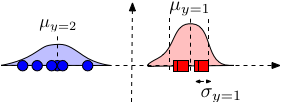

When is a continuous feature i.e. it takes a real value, we
use gaussian (or normal) distribution to model the class
conditional density e.g. area of an apartment in sq. feet.

$$
p(x_{j}∣y_{c}) ∼ N(μ_{jc},σ_{jc})
$$
i.e. We assume that each feature given label is drawn from a Gaussian Distribution.

It is parameterised by the mean $μ_{jc}$ and variance $σ_{jc}$
$$
P(x_{j}|y_{c};μ_{jc},σ_{jc}^2) = \cfrac{1}{\sqrt{2 \pi} \sigma_{jc}} \exp \left[- \cfrac{1}{2} \left(\cfrac{x_{j} - \mu_{jc}}{ \sigma_{jc}} \right)^2 \right]
$$
where,

$x_{j}$ is the value of the $j$-th feature,

$μ_{jc}$ is the mean of $x_{j}$ for class $y_{c}$

$\sigma_{jc}$ is the standard deviation of $x_{j}$ for class $y_{c}$

This is 1-D gaussian distribution. It models class conditional
density for a single feature.

#### Multivariate Gaussian Distribution
Alternately, we can use multivariate gaussian distribution to represent $p(x|y)$ with parameters mean vector $\mu_{m \times 1}$ and covariance matrix $\Sigma_{m \times m}$.

In Naive Bias setting, since the features are conditionally independent of one another, all entries of $ \Sigma $ except diagonal entries are zero.
$$
\sum_{jr}=0 \\ where j \neq r\\
$$
The diagonal entries represent variance of that feature i.e. 

$$\Sigma_{jj} = \sigma_{j}\\$$
$$
p(\mathbf x|y;\mu,\Sigma)=\cfrac{1}{\sqrt{(2\pi)^m|\Sigma|}}exp(-\cfrac{1}{2}(\mathbf x-\mu)^T\Sigma^{-1}(\mathbf x-\mu))
$$
There are $m \times k$ Gaussian Distributions - one for each feature and label
Each Gaussian Distribution has 2 parameters to estimate. Hence 
Total # of Parameters = $k \times 2m$

In [31]:
class GaussianNB(object):
    def fit(self,X,y):
        n_samples,n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)
        
        for idx, c in enumerate(self._classes):
            # Get examples with label c
            X_c=X[y==c]
            
            #estimate mean and varience from the training examples of class c
            self._mean[idx,:] = X_c.mean(axis=0)
            self._var[idx,:] = X_c.var(axis=0)
            
            #estimate the priors
            self._priors[idx] = X_c.shape[0]/float(n_samples)
            
        print("Mean : ",self._mean)
        print("Varience : ",self._var)
        print("Priors : ",self._priors)
        
    def _calc_pdf(self, class_idx, X):
            '''calculates probability density for samples for class label class_idx'''
            mean = self._mean[class_idx]
            var = np.diag(self._var[class_idx])
            z = np.power(2 * np.pi, X.shape[0]/2) * np.power(np.linalg.det(var), 0.5)
            return (1/z) * np.exp(-(1/2)*(X-mean).T@(np.linalg.inv(var))@(X-mean))
        
    def _calc_prod_likelihood_prior(self, X):
            '''Calculates product of likelihood and priors'''
            self._prod_likelihood_prior = np.zeros((X.shape[0], len(self._classes)), dtype=np.float64)
            for x_idx, x in enumerate(X):
                for idx, c in enumerate(self._classes):
                    self._prod_likelihood_prior[x_idx,c] = (
                        np.log(self._calc_pdf(idx,x)) + np.log(self._priors[idx]))
    def predict(self,X):
            '''Predicts class labels for each example'''
            self._calc_prod_likelihood_prior(X)
            return np.argmax(self._prod_likelihood_prior, axis=1)
        
    def predict_prob(self, X):
            '''Calculates probability of each sample belonging to different classes'''
            self._calc_prod_likelihood_prior(X)
            return np.exp(self._prod_likelihood_prior)/np.expand_dims(
                np.sum(np.exp(self._prod_likelihood_prior),axis=1),axis=1)
                

##### Lets Generate training data with two multivariate Gaussian Distribution, one with mean [5,5], std=1.5 and 2nd one with mean [10,10], std=1.5

In [32]:
from sklearn.datasets import make_classification, make_blobs
X,y = make_blobs(n_samples=100, n_features=2, centers=[[5,5],[10,10]], cluster_std=1.5)
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.2)

Lets Train the Gaussian Naive Bias Classifier

In [33]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train,y_train)

Mean :  [[ 4.82799425  4.77211094]
 [10.26079622 10.52593866]]
Varience :  [[2.45944395 1.91415842]
 [2.6910336  1.91335149]]
Priors :  [0.475 0.525]


Let us now plot the Gaussian Distributions

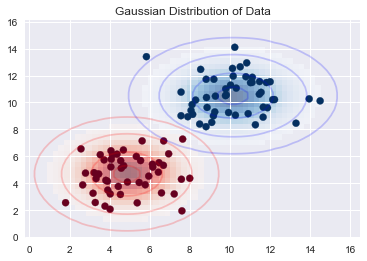

In [34]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')

xlim = (min(X[:,0])-2, max(X[:,0])+2)
ylim = (min(X[:,1])-2, max(X[:,1])+2)

xg = np.linspace(xlim[0],xlim[1],60)
yg = np.linspace(ylim[0],ylim[1],40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
for label, colour in enumerate(['red','blue']):
    mask = (y==label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid-mu)**2/std**2).prod(1)
    Pm = np.ma.masked_array(P,P<0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5, cmap=colour.title()+'s')
    ax.contour(xx, yy, P.reshape(xx.shape), levels=[0.01,0.1,0.5,0.9], colors=colour, alpha=0.2)
ax.set(xlim=xlim,ylim=ylim)
plt.title('Gaussian Distribution of Data')
plt.show()

##### Lets get class predictions for the test set and generate classification report to see how the classifier is doing

In [36]:
from sklearn.metrics import classification_report
gaussian_nb.predict(X_test)
print(classification_report(y_test,gaussian_nb.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



Sources

1. https://towardsdatascience.com/generative-vs-discriminative-classifiers-in-machine-learning-9ee265be859e
2. https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote05.html
3. https://www.atoti.io/how-to-solve-the-zero-frequency-problem-in-naive-bayes/